In [1]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [6]:
# read data file from local hard disk
data = pd.read_csv(r'C:\Users\Admin\Desktop\Assignment.csv')

# Exploratory Analysis:

In [7]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [8]:
data.shape

(155, 20)

In [9]:
#View the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [10]:
data.describe(include=['int64'])

,age
count,155.000000
mean,41.200000
std,12.565878
min,7.000000
25%,32.000000
50%,39.000000
75%,50.000000
max,78.000000


In [11]:
data.describe(include=['float64'])

,bilirubin,alk_phosphate,sgot,albumin,protime
count,149.000000,126.000000,151.00000,139.000000,88.000000
mean,1.427517,105.325397,85.89404,3.817266,61.852273
std,1.212149,51.508109,89.65089,0.651523,22.875244
min,0.300000,26.000000,14.00000,2.100000,0.000000
25%,0.700000,74.250000,31.50000,3.400000,46.000000
50%,1.000000,85.000000,58.00000,4.000000,61.000000
75%,1.500000,132.250000,100.50000,4.200000,76.250000
max,8.000000,295.000000,648.00000,6.400000,100.000000


In [12]:
data.describe(include=['object'])

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
count,155,154,154,154,154,145,144,150,150,150,150,155
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,female,True,True,False,False,True,False,False,False,False,False,live
freq,139,78,100,93,122,120,84,120,99,130,132,123


In [13]:
#observe the target variable
data.groupby('class').size()

class
die      32
live    123
dtype: int64

In [14]:
# Understanding the target variable 
data['class'].value_counts(normalize=True)

live    0.793548
die     0.206452
Name: class, dtype: float64

##Class Imbalance
Class imbalance occurs when the total number of observations in one class is significantly lower that the observations in the other class. Machine learning algorithms perform well when the number of observations in each class are similar but when there is a high class imbalance (90% in one class, 10% in the other class), problems arise leading to misclassification.

<AxesSubplot:>

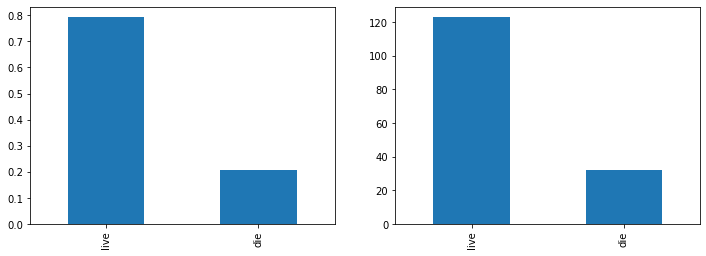

In [15]:
#Visualizing the distribution of the target variable
plt.figure(1,figsize=(12,4))
plt.subplot(121)
data['class'].value_counts(normalize=True).plot.bar()
plt.subplot(122)
data['class'].value_counts(normalize=False).plot.bar()

In [16]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [17]:
##finding missing values#calculate missing value percentage above 50 in each numerical column
missing_data=data.isnull().sum().sort_values(ascending=False)
percent=(missing_data/data.isnull().count()*100).sort_values(ascending=False)
f=pd.concat([missing_data,percent],axis=1,keys=['missing count','percent']).sort_values('missing count',ascending=False)
f[f['percent']>50]

,missing count,percent


In [18]:
# Fill na values with mean and mode
a=['steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices']
for i in a:
     data[i].fillna(data[i].mode()[0],inplace=True)

In [19]:
a=['bilirubin','alk_phosphate','sgot','albumin','protime','histology']
for i in a:
    data[i].fillna(data[i].median(),inplace=True)

In [20]:
data.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [21]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class


In [22]:
data.shape

(155, 20)

In [23]:
duplicate.sum()

0

[Text(-0.5, 0, '−0.50'),
 Text(-0.25, 0, '−0.25'),
 Text(0.0, 0, '0.00'),
 Text(0.25, 0, '0.25'),
 Text(0.5, 0, '0.50'),
 Text(0.75, 0, '0.75'),
 Text(1.0, 0, '1.00'),
 Text(1.25, 0, '1.25'),
 Text(1.5, 0, '1.50')]

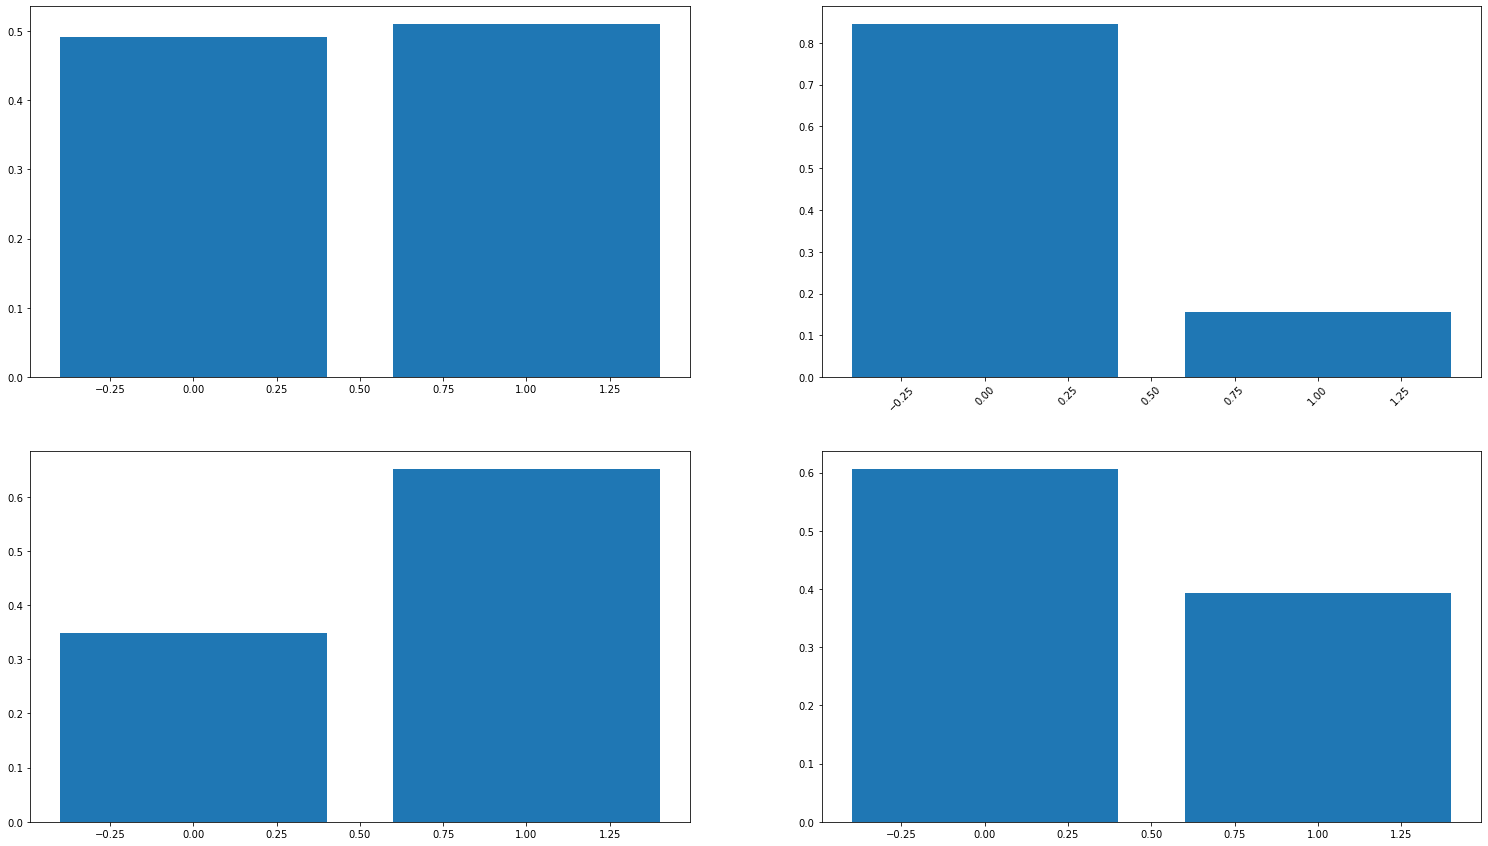

In [24]:
#VISUALIZING CATEGORICAL VARIABLES
fig, ax=plt.subplots(2,2,figsize=(26,15)) 
ax[0,0].bar(data['steroid'].value_counts().index,data['steroid'].value_counts(normalize=True))
ax[0,1].bar(data['antivirals'].value_counts().index,data['antivirals'].value_counts(normalize=True))
ax[1,0].bar(data['fatigue'].value_counts().index,data['fatigue'].value_counts(normalize=True))
ax[1,1].bar(data['malaise'].value_counts().index,data['malaise'].value_counts(normalize=True))
plt.draw()
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

[Text(-0.5, 0, '−0.50'),
 Text(-0.25, 0, '−0.25'),
 Text(0.0, 0, '0.00'),
 Text(0.25, 0, '0.25'),
 Text(0.5, 0, '0.50'),
 Text(0.75, 0, '0.75'),
 Text(1.0, 0, '1.00'),
 Text(1.25, 0, '1.25'),
 Text(1.5, 0, '1.50')]

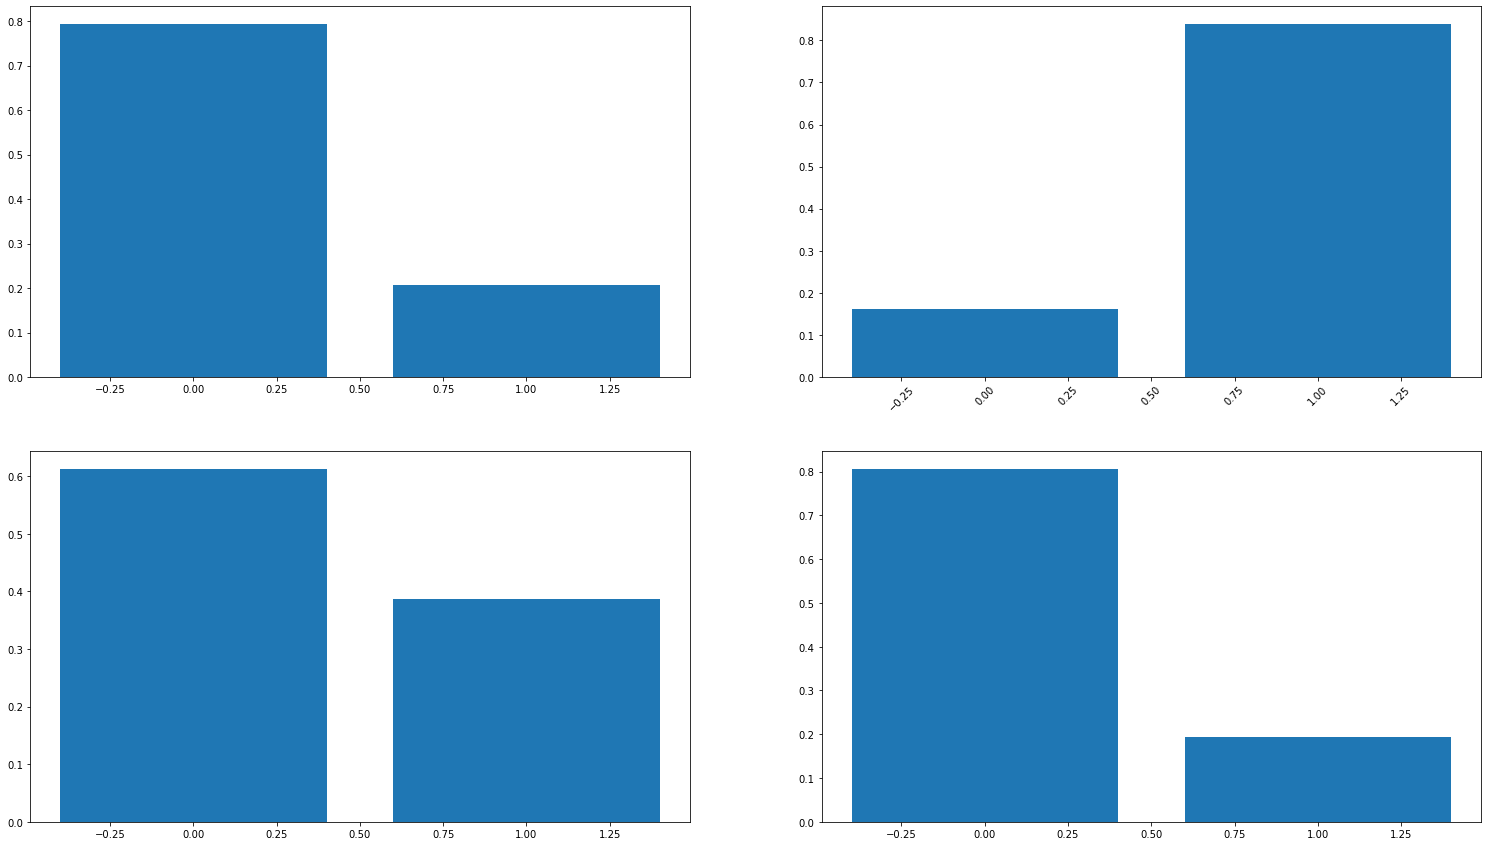

In [25]:
fig, ax=plt.subplots(2,2,figsize=(26,15)) 
ax[0,0].bar(data['anorexia'].value_counts().index,data['anorexia'].value_counts(normalize=True))
ax[0,1].bar(data['liver_big'].value_counts().index,data['liver_big'].value_counts(normalize=True))
ax[1,0].bar(data['liver_firm'].value_counts().index,data['liver_firm'].value_counts(normalize=True))
ax[1,1].bar(data['spleen_palpable'].value_counts().index,data['spleen_palpable'].value_counts(normalize=True))
plt.draw()
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

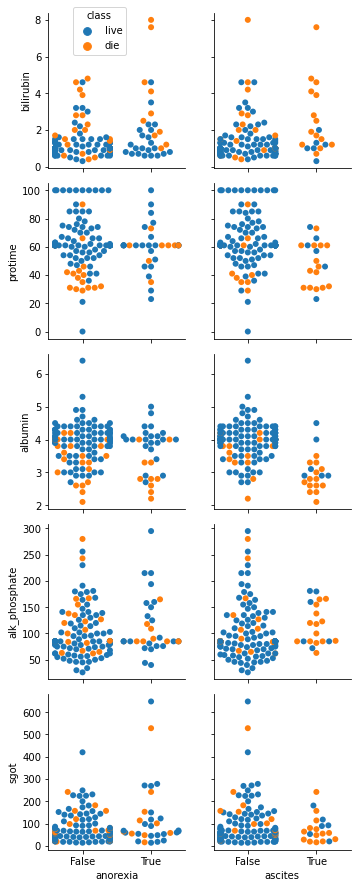

In [30]:
#advance visualisation technique
graph = sns.PairGrid(data,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96))

It is possible to observe that there is no difference in the variables plotted regarding the ANOREXIA status. This can be evidenced by the fact that not only patients from both levels of Class are distributed homogeneously but also there is not difference in the expression of the variables analyzed regarding the levels of ANOREXIA. On the other hand, we can see a trend that patients with Class 0 tend to have ascites. However, there is no differences in how the variables are expressed regarding ASCITES status.

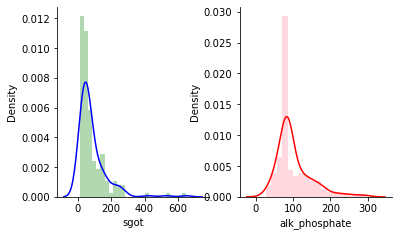

In [31]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(data['sgot'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(data['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine()

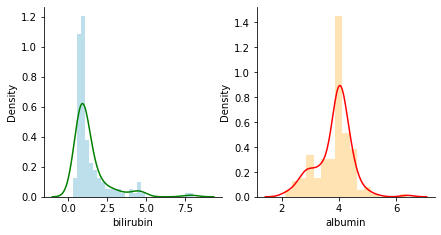

In [37]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(data['bilirubin'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(data['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})
sns.despine();

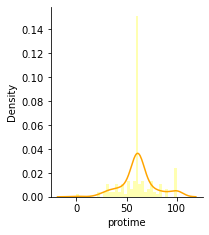

In [33]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(data['protime'], 
             kde_kws={"color":"orange","lw":1.5,"alpha":0.8},
             hist_kws={"color":"yellow","alpha":0.3})
sns.despine();

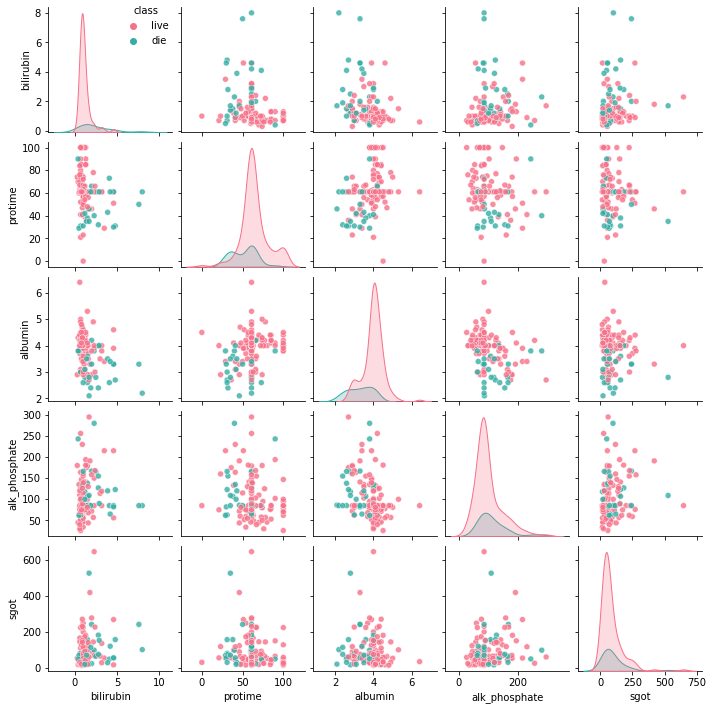

In [36]:
#scatter pointss
g = sns.pairplot(data, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));